In [1]:
import numpy as np
import matplotlib.pyplot as plt
import neurolab as nl

# Sequential data analysis using Recursive Neural Networks

In [5]:
def get_data(num_points) : 
    #creating sine wave
    wave_1 = 0.5 * np.sin(np.arange(0, num_points))
    wave_2 = 3.6 * np.sin(np.arange(0, num_points))
    wave_3 = 1.1 * np.sin(np.arange(0, num_points))
    wave_4 = 4.7 * np.sin(np.arange(0, num_points))

    amp_1 = np.ones(num_points)
    amp_2 = 2.1 + np.zeros(num_points)
    amp_3 = 3.2 + np.zeros(num_points)
    amp_4 = 0.8 + np.zeros(num_points)
    
    wave = np.array([wave_1, wave_2, wave_3, wave_4]).reshape(num_points * 4, 1)
    amp = np.array([amp_1, amp_2, amp_3, amp_4]).reshape(num_points * 4, 1)
    
    return wave, amp

In [21]:
#output visualization
def visualize_output(nn, num_points_test) : 
    wave, amp = get_data(num_points_test)
    output = nn.sim(wave)
    plt.plot(amp.reshape(num_points_test * 4))
    plt.plot(output.reshape(num_points_test * 4))
    plt.show()

In [7]:
#creating sample data
num_points = 40 
wave, amp = get_data(num_points)

In [8]:
#two-layer recursive perceptron
nn = nl.net.newelm([[-2,2]], [10,1], [nl.trans.TanSig(), nl.trans.PureLin()])

In [9]:
#initialization function for each layer
nn.layers[0].initf = nl.init.InitRand([-0.1, 0.1], "wb")
nn.layers[1].initf = nl.init.InitRand([-0.1, 0.1], "wb")
nn.init()

In [10]:
#learning recursive NN
error_progress = nn.train(wave, amp, epochs=1200, show=100, goal=0.01)

Epoch: 100; Error: 0.8570349316042435;
Epoch: 200; Error: 0.7151978762894492;
Epoch: 300; Error: 0.6295666795756792;
Epoch: 400; Error: 0.31590670567571755;
Epoch: 500; Error: 0.24520570925891957;
Epoch: 600; Error: 0.16562842580801812;
Epoch: 700; Error: 0.09534259097129591;
Epoch: 800; Error: 0.07981479127140821;
Epoch: 900; Error: 0.07038851953471315;
Epoch: 1000; Error: 0.06976877636976382;
Epoch: 1100; Error: 0.06201939155201447;
Epoch: 1200; Error: 0.05963937497899456;
The maximum number of train epochs is reached


In [11]:
#prediction with train data
output = nn.sim(wave)

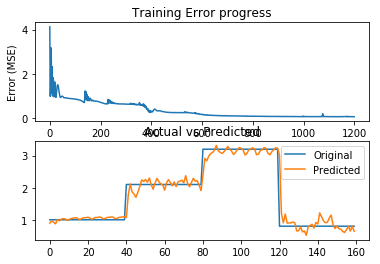

In [15]:
#output visualization
plt.figure() 

plt.subplot(211)
plt.plot(error_progress)
plt.xlabel("Number of epochs")
plt.ylabel("Error (MSE)")
plt.title("Training Error progress")

plt.subplot(212)
plt.plot(amp.reshape(num_points * 4))
plt.plot(output.reshape(num_points * 4))
plt.legend(["Original", "Predicted"])
plt.title("Actual vs Predicted")

plt.show()

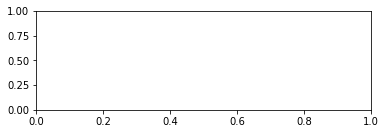

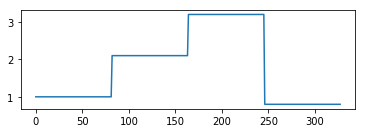

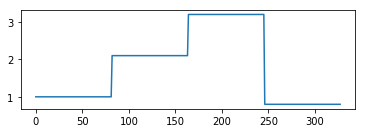

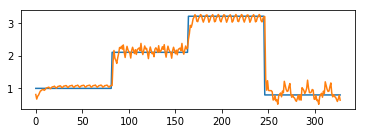

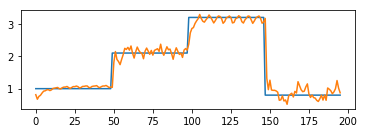

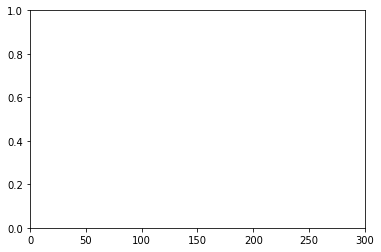

In [22]:
#performance check with test data
plt.figure()

plt.subplot(211)
visualize_output(nn, 82)
plt.xlim([0, 300])

plt.subplot(212)
visualize_output(nn, 49)
plt.xlim([0, 300])

plt.show()